In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
from ydata_profiling import ProfileReport

# **Data Preprocessing**

In [9]:
df = pd.read_csv('swiggy_file.csv')


In [10]:
df.head()

Restaurant Name               Cuisine Rating Number of Ratings  \
0  La Pino'Z Pizza        Pizzas, Pastas    4.0       10+ ratings   
1  The Second Wife  Indian, North Indian    3.6       50+ ratings   
2      Tasty Bites    Italian, Beverages    3.8       10+ ratings   
3      Food Studio       Pizzas, Burgers    3.5         8 ratings   
4     Roll Express     Fast Food, Snacks    4.3      100+ ratings   

  Average Price  Number of Offers  \
0  ₹250 for two                 2   
1  ₹250 for two                 2   
2  ₹200 for two                 1   
3   ₹49 for two                 5   
4  ₹200 for two                 2   

                                          Offer Name                    Area  \
0  FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...  LALA LAJPAT RAI MARKET   
1  30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...          Central Abohar   
2               FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500          Central Abohar   
3  50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...          Central Abohar   
4  DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...           Circular Road   

  Pure Veg Location  
0       No   Abohar  
1       No   Abohar  
2      Yes   Abohar  
3      Yes   Abohar  
4       No   Abohar

In [11]:
df.shape

(140657, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140657 entries, 0 to 140656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Restaurant Name    140657 non-null  object
 1   Cuisine            140630 non-null  object
 2   Rating             140657 non-null  object
 3   Number of Ratings  126115 non-null  object
 4   Average Price      140657 non-null  object
 5   Number of Offers   140657 non-null  int64 
 6   Offer Name         138849 non-null  object
 7   Area               140655 non-null  object
 8   Pure Veg           140657 non-null  object
 9   Location           140657 non-null  object
dtypes: int64(1), object(9)
memory usage: 10.7+ MB


In [13]:
df.columns

Index(['Restaurant Name', 'Cuisine', 'Rating', 'Number of Ratings',
       'Average Price', 'Number of Offers', 'Offer Name', 'Area', 'Pure Veg',
       'Location'],
      dtype='object')

In [14]:
df.describe()

Number of Offers
count     140657.000000
mean           3.187890
std            1.583943
min            0.000000
25%            1.000000
50%            4.000000
75%            5.000000
max            5.000000

In [15]:
df.nunique()

Restaurant Name      100665
Cuisine                2133
Rating                   43
Number of Ratings        17
Average Price           501
Number of Offers          6
Offer Name            19367
Area                  16307
Pure Veg                  2
Location                581
dtype: int64

In [16]:
df.isnull().sum()

Restaurant Name          0
Cuisine                 27
Rating                   0
Number of Ratings    14542
Average Price            0
Number of Offers         0
Offer Name            1808
Area                     2
Pure Veg                 0
Location                 0
dtype: int64

In [17]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [18]:
print(X.head())

   Restaurant Name               Cuisine Rating Number of Ratings  \
0  La Pino'Z Pizza        Pizzas, Pastas    4.0       10+ ratings   
1  The Second Wife  Indian, North Indian    3.6       50+ ratings   
2      Tasty Bites    Italian, Beverages    3.8       10+ ratings   
3      Food Studio       Pizzas, Burgers    3.5         8 ratings   
4     Roll Express     Fast Food, Snacks    4.3      100+ ratings   

  Average Price  Number of Offers  \
0  ₹250 for two                 2   
1  ₹250 for two                 2   
2  ₹200 for two                 1   
3   ₹49 for two                 5   
4  ₹200 for two                 2   

                                          Offer Name                    Area  \
0  FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...  LALA LAJPAT RAI MARKET   
1  30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...          Central Abohar   
2               FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500          Central Abohar   
3  50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129

In [19]:
print(Y.head())

0    Abohar
1    Abohar
2    Abohar
3    Abohar
4    Abohar
Name: Location, dtype: object


In [20]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Cleaning**

In [21]:
#The average price is replaced from 'â‚¹50 for one' to 50
df['Average Price'] = df['Average Price'].str.extract('(\d+)').fillna(0).astype(int)
df.head(3)

Restaurant Name               Cuisine Rating Number of Ratings  \
0  La Pino'Z Pizza        Pizzas, Pastas    4.0       10+ ratings   
1  The Second Wife  Indian, North Indian    3.6       50+ ratings   
2      Tasty Bites    Italian, Beverages    3.8       10+ ratings   

   Average Price  Number of Offers  \
0            250                 2   
1            250                 2   
2            200                 1   

                                          Offer Name                    Area  \
0  FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...  LALA LAJPAT RAI MARKET   
1  30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...          Central Abohar   
2               FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500          Central Abohar   

  Pure Veg Location  
0       No   Abohar  
1       No   Abohar  
2      Yes   Abohar

In [22]:
#The restaurants with rating '-' is replaced with zero
df['Rating'] = df['Rating'].replace('-', '0')
df.head(3)

Restaurant Name               Cuisine Rating Number of Ratings  \
0  La Pino'Z Pizza        Pizzas, Pastas    4.0       10+ ratings   
1  The Second Wife  Indian, North Indian    3.6       50+ ratings   
2      Tasty Bites    Italian, Beverages    3.8       10+ ratings   

   Average Price  Number of Offers  \
0            250                 2   
1            250                 2   
2            200                 1   

                                          Offer Name                    Area  \
0  FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...  LALA LAJPAT RAI MARKET   
1  30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...          Central Abohar   
2               FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500          Central Abohar   

  Pure Veg Location  
0       No   Abohar  
1       No   Abohar  
2      Yes   Abohar

In [23]:
#The restaurants with rating '-' is replaced with zero
df['Number of Ratings'] = df['Number of Ratings'].replace('Too Few Ratings', '0')
df.head(3)

Restaurant Name               Cuisine Rating Number of Ratings  \
0  La Pino'Z Pizza        Pizzas, Pastas    4.0       10+ ratings   
1  The Second Wife  Indian, North Indian    3.6       50+ ratings   
2      Tasty Bites    Italian, Beverages    3.8       10+ ratings   

   Average Price  Number of Offers  \
0            250                 2   
1            250                 2   
2            200                 1   

                                          Offer Name                    Area  \
0  FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...  LALA LAJPAT RAI MARKET   
1  30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...          Central Abohar   
2               FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500          Central Abohar   

  Pure Veg Location  
0       No   Abohar  
1       No   Abohar  
2      Yes   Abohar

In [24]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\+.*', '', regex=True)
df.head(3)

Restaurant Name               Cuisine Rating Number of Ratings  \
0  La Pino'Z Pizza        Pizzas, Pastas    4.0                10   
1  The Second Wife  Indian, North Indian    3.6                50   
2      Tasty Bites    Italian, Beverages    3.8                10   

   Average Price  Number of Offers  \
0            250                 2   
1            250                 2   
2            200                 1   

                                          Offer Name                    Area  \
0  FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...  LALA LAJPAT RAI MARKET   
1  30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...          Central Abohar   
2               FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500          Central Abohar   

  Pure Veg Location  
0       No   Abohar  
1       No   Abohar  
2      Yes   Abohar

In [25]:
df['Offer Name'] = df['Offer Name'].str.replace('\n', ',')
df.head(3)

Restaurant Name               Cuisine Rating Number of Ratings  \
0  La Pino'Z Pizza        Pizzas, Pastas    4.0                10   
1  The Second Wife  Indian, North Indian    3.6                50   
2      Tasty Bites    Italian, Beverages    3.8                10   

   Average Price  Number of Offers  \
0            250                 2   
1            250                 2   
2            200                 1   

                                          Offer Name                    Area  \
0  FLAT DEAL,FLAT ₹125 OFF,USE FLAT125ABOVE ₹699,...  LALA LAJPAT RAI MARKET   
1  30% OFF UPTO ₹75,USE TRYNEWABOVE ₹149, FLAT ₹1...          Central Abohar   
2                FLAT ₹120 OFF,USE AXIS120ABOVE ₹500          Central Abohar   

  Pure Veg Location  
0       No   Abohar  
1       No   Abohar  
2      Yes   Abohar

# **EDA**

*Ratio of NON-VEG and PURE-VEG*

In [26]:
pure_veg_counts = df['Pure Veg'].value_counts().reset_index()
pure_veg_counts.columns = ['Pure Veg', 'Count']

# Plot a pie chart
fig = px.pie(
    pure_veg_counts,
    names='Pure Veg',
    values='Count',
    title='Distribution of Pure Vegetarian Restaurants',
    color_discrete_sequence=px.colors.qualitative.Set3,
    template='plotly_dark'
)

fig.show()

*Ratio of Rating for restaurents*

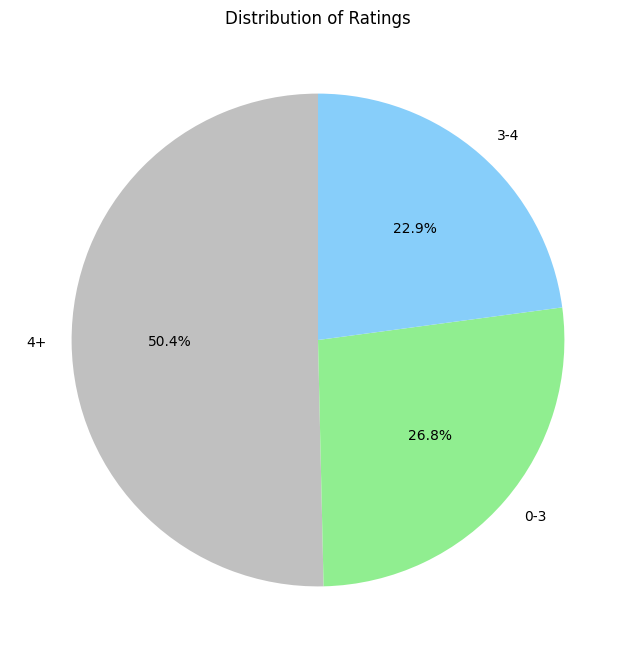

In [27]:
import matplotlib.pyplot as plt

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating Category'] = df['Rating'].apply(lambda x: '0-3' if pd.isna(x) or x < 3 else ('3-4' if x < 4 else '4+'))
rating_counts = df['Rating Category'].value_counts()
colors = ['silver', 'lightgreen', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Ratings')
plt.show()

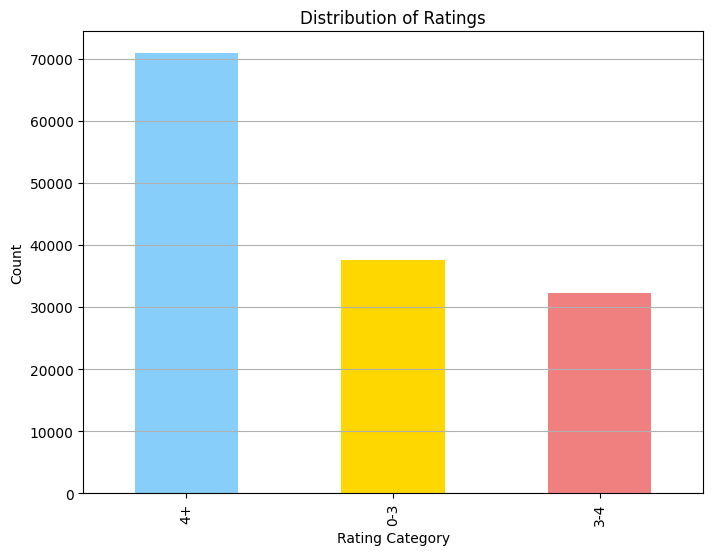

In [28]:
import matplotlib.pyplot as plt
import pandas as pd


df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df['Rating Category'] = df['Rating'].apply(lambda x: '0-3' if pd.isna(x) or x < 3 else ('3-4' if x < 4 else '4+'))

# Count the occurrences of each rating category
rating_counts = df['Rating Category'].value_counts()

colors = {'0-3': 'gold', '3-4': 'lightcoral', '4+': 'lightskyblue'}

plt.figure(figsize=(8, 6))

# Plot the bar graph
rating_counts.plot(kind='bar', color=[colors[category] for category in rating_counts.index])

plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

plt.grid(axis='y')
plt.show()


*Ratio of average prices* **bold text**

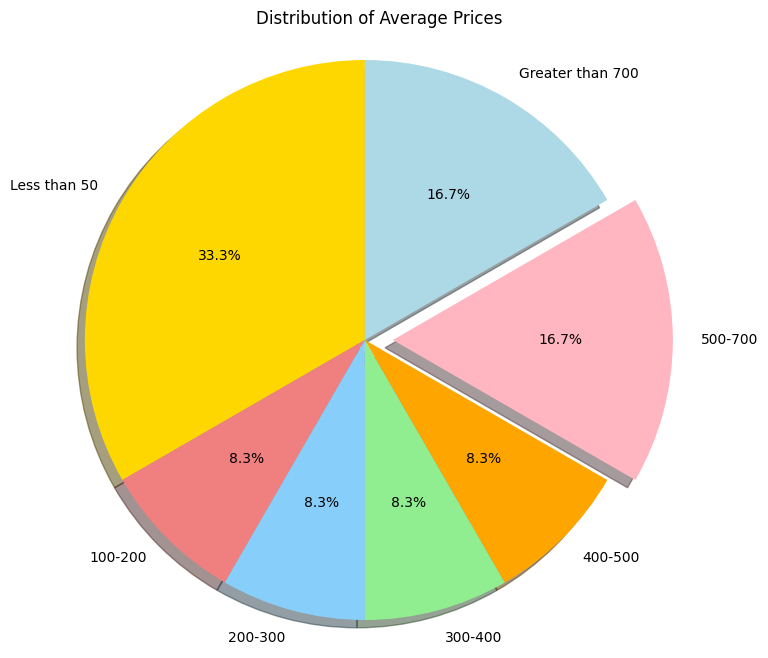

In [29]:
import matplotlib.pyplot as plt

# After getting the unique prices, we can divide them into different categories
unique_prices = [50, 100, 150, 200, 250, 300, 500, 400, 350, 450, 40, 0, 550, 48, 1, 600, 32, 900, 750, 800, 650, 10, 12, 850, 2]

# Define the price ranges
price_ranges = {
    'Less than 50': lambda x: x < 50,
    '100-200': lambda x: 100 <= x < 200,
    '200-300': lambda x: 200 <= x < 300,
    '300-400': lambda x: 300 <= x < 400,
    '400-500': lambda x: 400 <= x < 500,
    '500-700': lambda x: 500 <= x < 700,
    'Greater than 700': lambda x: x > 700
}

# Count the occurrences in each price range
price_counts = {range_name: sum(price_range(price) for price in unique_prices) for range_name, price_range in price_ranges.items()}

# Get labels and sizes for the pie chart
labels = price_counts.keys()
sizes = price_counts.values()

# Define colors for the pie chart segments
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'lightpink', 'lightblue']

# Explode out a segment to highlight it
explode = (0, 0, 0, 0, 0, 0.1, 0)  # "500-700" range will be exploded out

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Distribution of Average Prices')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


*Top 15 cuisine*

In [30]:
#To find all possible Cuisine in the dataset
cuisine_column = df['Cuisine']

all_cuisines = [cuisine.split(', ') for cuisine in cuisine_column if pd.notna(cuisine)]
unique_cuisines = set([c for sublist in all_cuisines for c in sublist])

# print("All Possible Cuisines:", unique_cuisines)

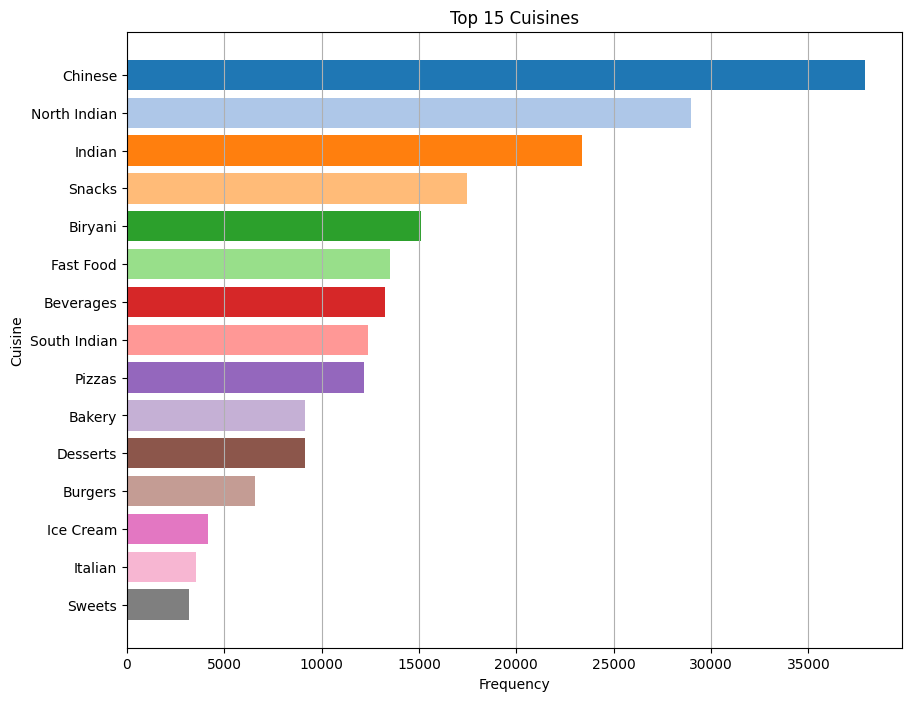

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
# Replace 'df' with your actual DataFrame name

# Splitting cuisines and counting occurrences
cuisine_counts = df['Cuisine'].str.split(', ').explode().value_counts()

# Selecting top 15 cuisines
top_15_cuisines = cuisine_counts.head(15)

# Creating a DataFrame for plotting
plot_data = pd.DataFrame({'Cuisine': top_15_cuisines.index, 'Frequency': top_15_cuisines.values})

# Define colors for the bar plot
colors = plt.cm.tab20.colors[:len(plot_data)]

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(plot_data['Cuisine'], plot_data['Frequency'], color=colors)

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.title('Top 15 Cuisines')

# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent cuisine at the top
plt.grid(axis='x')  # Add grid lines along the x-axis for better readability
plt.show()


# Number of restaurents availabel for each cuisins

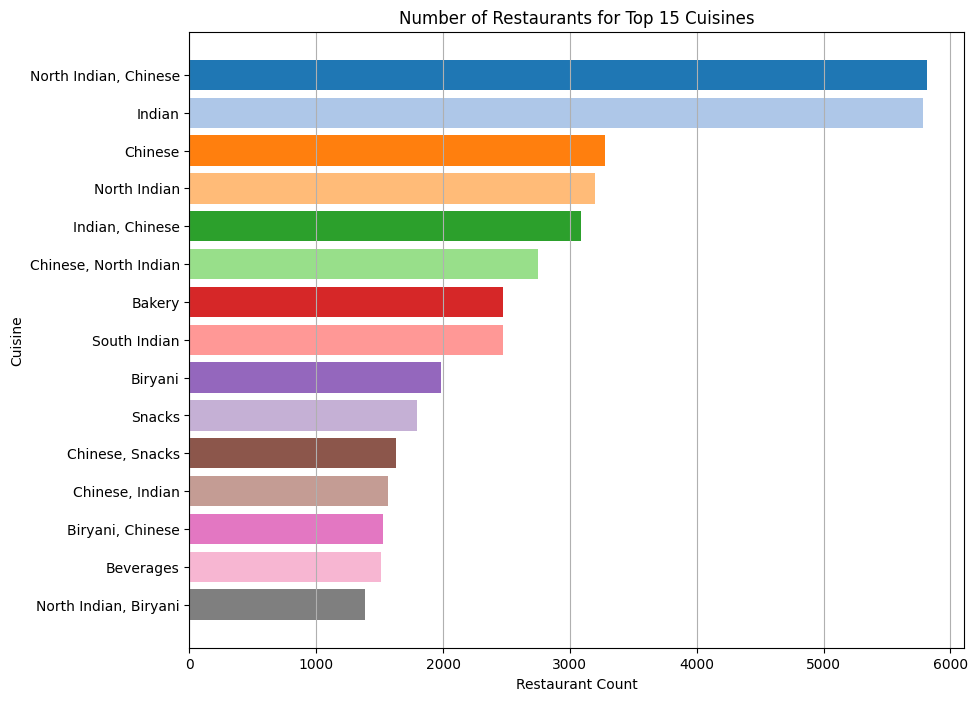

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
# Replace 'df' with your actual DataFrame name

# Grouping by cuisine and counting unique restaurant names
restaurant_counts_per_cuisine = df.groupby('Cuisine')['Restaurant Name'].nunique().sort_values(ascending=False)

# Selecting the top 15 cuisines by restaurant count
top_15_cuisines_restaurant_count = restaurant_counts_per_cuisine.head(15)

# Preparing data for plotting
plot_data_restaurants = pd.DataFrame({'Cuisine': top_15_cuisines_restaurant_count.index, 'Restaurant Count': top_15_cuisines_restaurant_count.values})

# Define colors for the bar plot
colors = plt.cm.tab20.colors[:len(plot_data_restaurants)]

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(plot_data_restaurants['Cuisine'], plot_data_restaurants['Restaurant Count'], color=colors)

# Add labels and title
plt.xlabel('Restaurant Count')
plt.ylabel('Cuisine')
plt.title('Number of Restaurants for Top 15 Cuisines')

# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent cuisine at the top
plt.grid(axis='x')  # Add grid lines along the x-axis for better readability
plt.show()


** Reprsentation of Number of Offers provided by Eateries**

<ipython-input-33-e55301219099>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




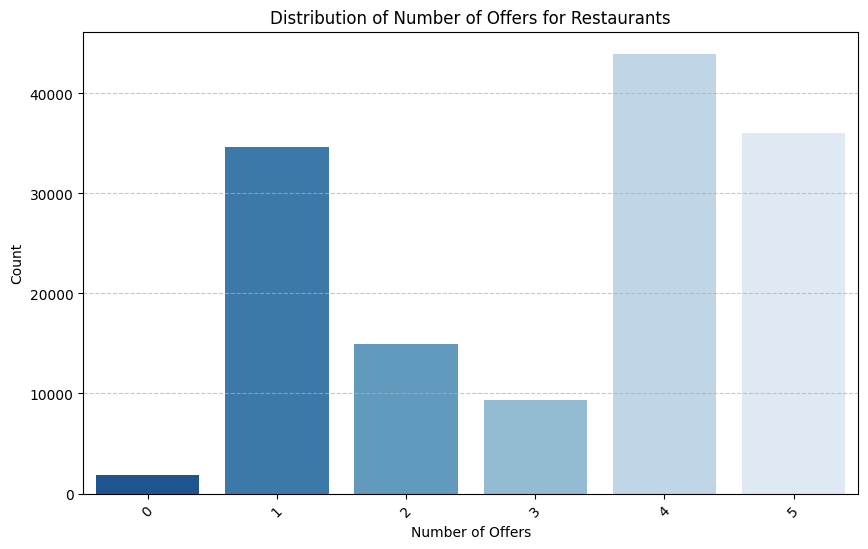

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
# Replace 'df' with your actual DataFrame name

# Calculate the distribution of the number of offers
number_of_offers_distribution = df['Number of Offers'].value_counts()

# Set a custom color palette for the plot
custom_palette = sns.color_palette("Blues_r", len(number_of_offers_distribution))

# Plotting the distribution of the number of offers using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=number_of_offers_distribution.index, y=number_of_offers_distribution.values, palette=custom_palette)
plt.xlabel('Number of Offers')
plt.ylabel('Count')
plt.title('Distribution of Number of Offers for Restaurants')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()


*TOP 15 locations with the best in class reviews and ratings*

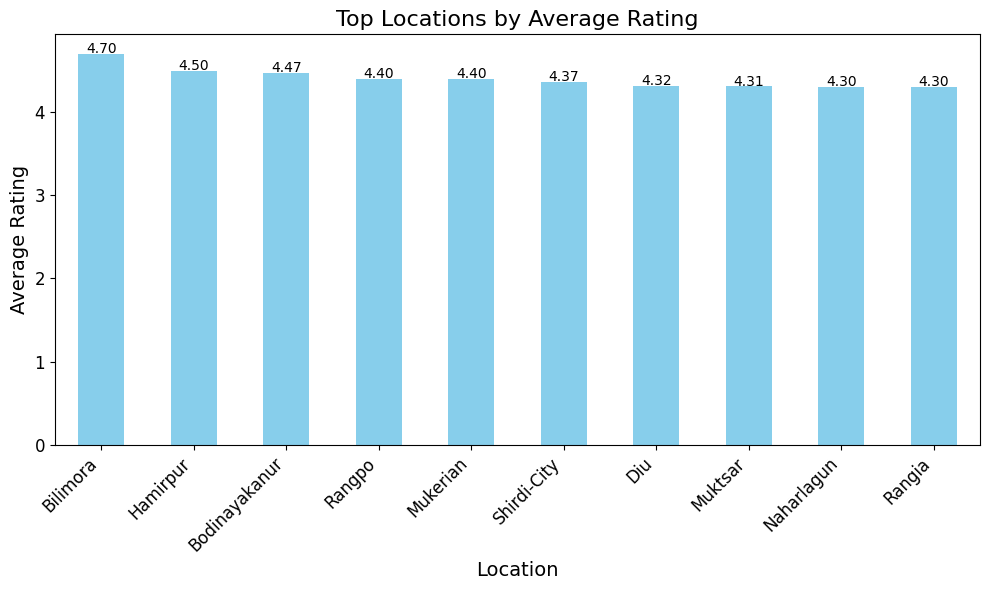

In [35]:
import matplotlib.pyplot as plt

# Check if 'Rating' column exists in the DataFrame
if 'Rating' in df.columns:
    # Group by location and calculate the mean rating
    location_rating = df.groupby('Location')['Rating'].mean()

    # Sort locations by mean rating in descending order
    top_locations = location_rating.sort_values(ascending=False).head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_locations.plot(kind='bar', color='skyblue')

    # Adding labels and title
    plt.title('Top Locations by Average Rating', fontsize=16)
    plt.xlabel('Location', fontsize=14)
    plt.ylabel('Average Rating', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Adding ratings on top of the bars
    for i, rating in enumerate(top_locations):
        plt.text(i, rating + 0.01, f'{rating:.2f}', ha='center', fontsize=10)

    # Display plot
    plt.tight_layout()
    plt.show()
else:
    print("Rating and Review data is not available in the given dataset.")


*Locations with the most number of restaurants*

In [41]:
import plotly.express as px

# Get the top 10 areas with the most restaurants
top_10_areas = df['Location'].value_counts().head(10)

# Create a bar plot
fig = px.bar(top_10_areas,
             x=top_10_areas.index,  # Location on x-axis
             y=top_10_areas.values,  # Number of restaurants on y-axis
             title='Top 10 Areas with the Most Restaurants',
             labels={'x': 'Location', 'y': 'Number of Restaurants'},  # Custom axis labels
             color=top_10_areas.values,  # Color bars based on the number of restaurants
             color_continuous_scale='Blues',  # Color scale for bars
             template='plotly_dark',  # Dark theme for better contrast
             width=800,  # Set plot width
             height=500,  # Set plot height
            )

# Update axis title colors
fig.update_xaxes(title_font_color='white')
fig.update_yaxes(title_font_color='white')

# Update layout
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Set transparent background
    plot_bgcolor='rgba(0,0,0,0)',  # Set transparent plot background
    font_color='white',  # Set font color to white
    showlegend=False,  # Hide legend
)

# Show plot
fig.show()


<ipython-input-61-c9c733901ffb>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




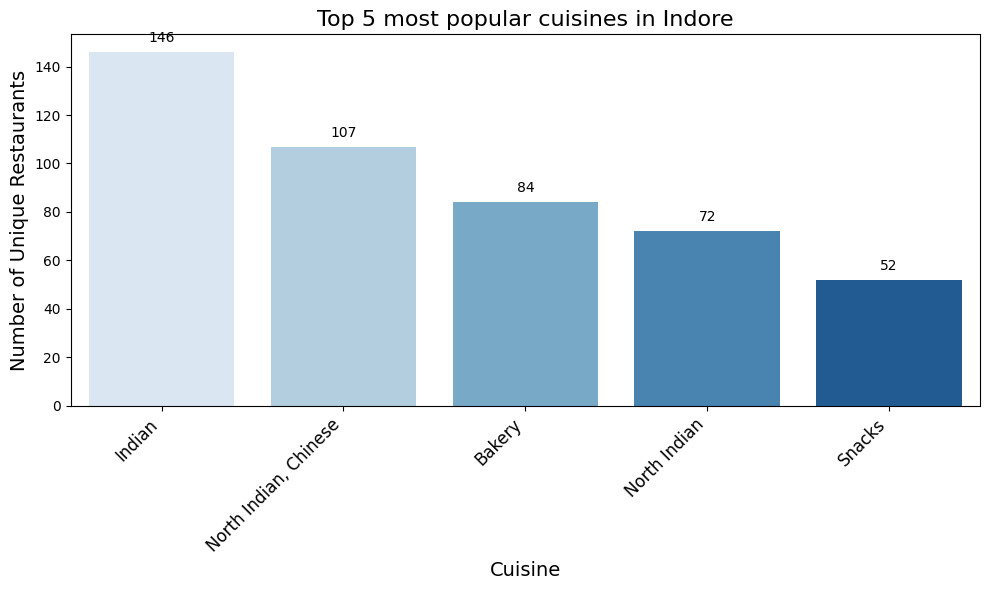

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is defined
df_city = df[df['Location'].notnull()]

# Group the data by city and cuisine and calculate the number of unique restaurants for each cuisine
pivot_table = df_city.pivot_table(index='Location', columns='Cuisine', values='Restaurant Name', aggfunc=lambda x: len(x.unique()))

# Sort the pivot table by the number of unique restaurants in descending order
pivot_table = pivot_table.sort_values(by='South Indian', ascending=False)

# Filter the pivot table to only include rows with the "Nashik" index
indore_pivot_table = pivot_table.loc['Indore']

# Get the top 5 most popular cuisines from the filtered pivot table
top_cuisines = indore_pivot_table.sort_values(ascending=False)[:5]

# Create a figure and axis object using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="Blues")

# Set title and labels
plt.title("Top 5 most popular cuisines in Indore", fontsize=16)
plt.xlabel("Cuisine", fontsize=14)
plt.ylabel("Number of Unique Restaurants", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=10,
                color='black')

# Show plot
plt.tight_layout()
plt.show()


<ipython-input-60-9bf06d899e8f>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




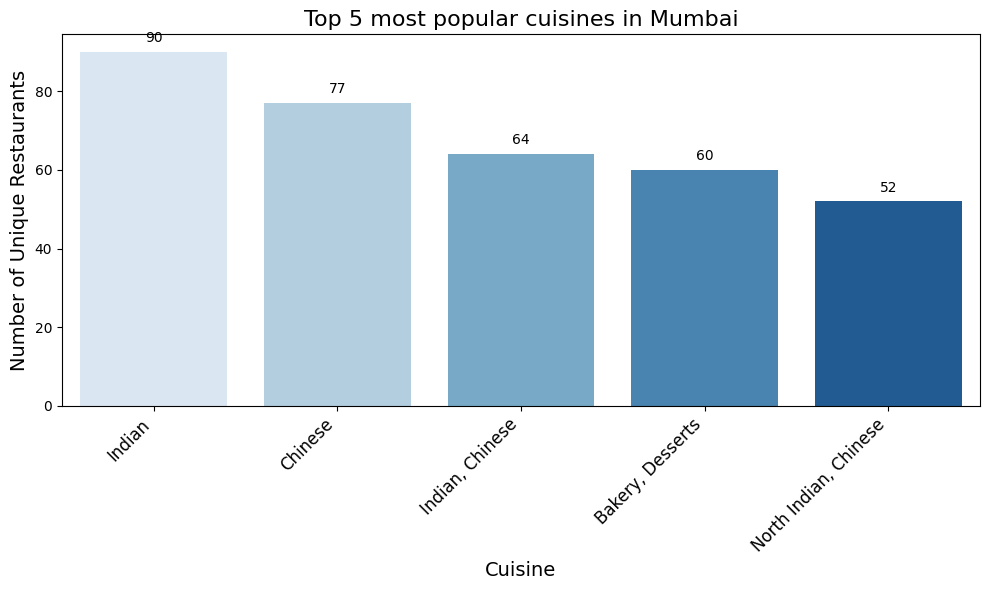

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is defined
df_city = df[df['Location'].notnull()]

# Group the data by city and cuisine and calculate the number of unique restaurants for each cuisine
pivot_table = df_city.pivot_table(index='Location', columns='Cuisine', values='Restaurant Name', aggfunc=lambda x: len(x.unique()))

# Sort the pivot table by the number of unique restaurants in descending order
pivot_table = pivot_table.sort_values(by='South Indian', ascending=False)

# Filter the pivot table to only include rows with the "Mumbai" index
mumbai_pivot_table = pivot_table.loc['Mumbai']

# Get the top 5 most popular cuisines from the filtered pivot table
top_cuisines = mumbai_pivot_table.sort_values(ascending=False)[:5]

# Create a figure and axis object using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="Blues")

# Set title and labels
plt.title("Top 5 most popular cuisines in Mumbai", fontsize=16)
plt.xlabel("Cuisine", fontsize=14)
plt.ylabel("Number of Unique Restaurants", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=10,
                color='black')

# Show plot
plt.tight_layout()
plt.show()


# TOP CUSINES ACCORDING TO LOCATION

<ipython-input-59-b461785fda76>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




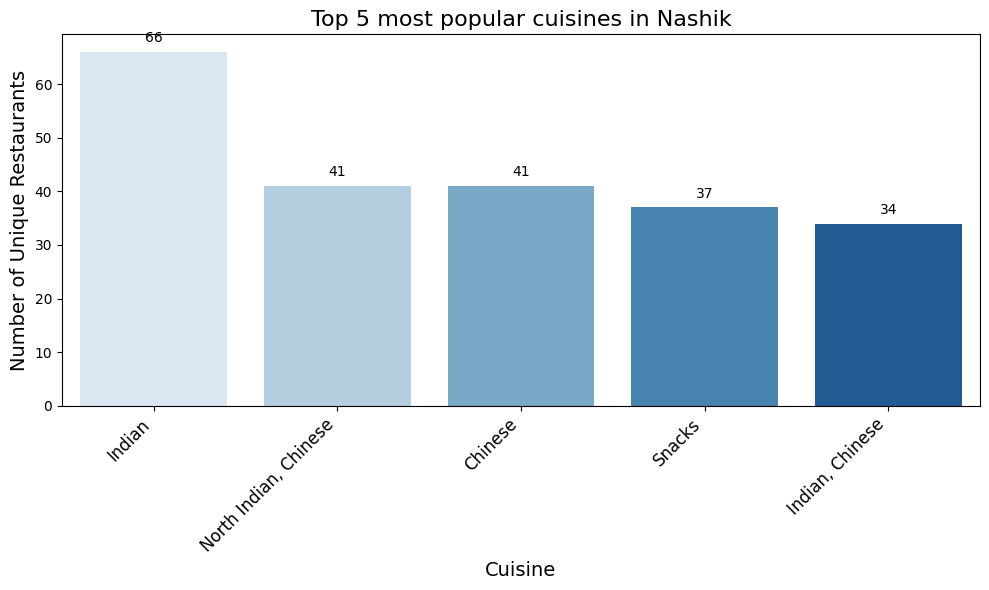

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is defined
df_city = df[df['Location'].notnull()]

# Group the data by city and cuisine and calculate the number of unique restaurants for each cuisine
pivot_table = df_city.pivot_table(index='Location', columns='Cuisine', values='Restaurant Name', aggfunc=lambda x: len(x.unique()))

# Sort the pivot table by the number of unique restaurants in descending order
pivot_table = pivot_table.sort_values(by='South Indian', ascending=False)

# Filter the pivot table to only include rows with the "Nashik" index
nashik_pivot_table = pivot_table.loc['Nashik']

# Get the top 5 most popular cuisines from the filtered pivot table
top_cuisines = nashik_pivot_table.sort_values(ascending=False)[:5]

# Create a figure and axis object using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="Blues")

# Set title and labels
plt.title("Top 5 most popular cuisines in Nashik", fontsize=16)
plt.xlabel("Cuisine", fontsize=14)
plt.ylabel("Number of Unique Restaurants", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize=10,
                color='black')

# Show plot
plt.tight_layout()
plt.show()


In [45]:
# Filter the dataframe to only include rows with the "Location" column
df_city = df[df['Location'].notnull()]

# Group the dataframe by the "Location" column
grouped_by_city = df_city.groupby('Location')

# Display the top 5 most popular cuisines for each city
print("Top 5 most popular cuisines in each city:")
for city, group in grouped_by_city:
    print(f"\nLocation: {city}")
    # Filter the group by city and count the occurrences of each cuisine
    cuisine_counts = group['Cuisine'].value_counts()
    # Sort the resulting dataframe by the number of unique restaurants in descending order
    cuisine_counts = cuisine_counts.sort_values(ascending=False)
    print(cuisine_counts[:5].head(5))


Streaming output truncated to the last 5000 lines.
Indian                         16
North Indian, Maharashtrian    16
North Indian                   14
Name: count, dtype: int64

Location: Amreli
Cuisine
Chinese, North Indian    3
North Indian, Mughlai    3
Snacks                   3
Ice Cream, Desserts      2
Indian                   2
Name: count, dtype: int64

Location: Amritsar
Cuisine
Indian                   66
North Indian, Chinese    39
North Indian             38
Pizzas                   32
Chinese                  28
Name: count, dtype: int64

Location: Anand
Cuisine
North Indian, Chinese    20
Indian                   16
Snacks                   12
Chinese                  11
Pizzas                    8
Name: count, dtype: int64

Location: Anantapur
Cuisine
Biryani                  20
South Indian             17
Biryani, South Indian    15
Bakery, Desserts         10
Biryani, Indian           9
Name: count, dtype: int64

Location: Ankleshwar
Cuisine
Indian                  

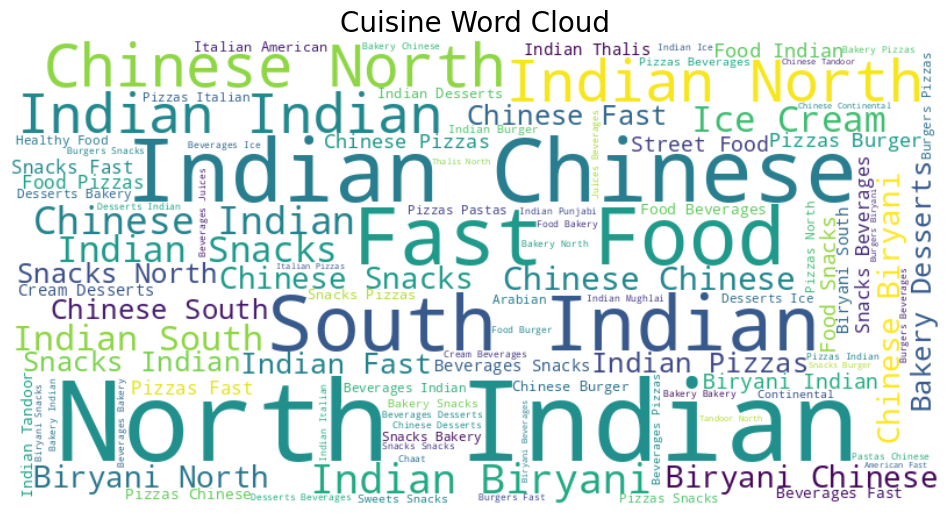

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all cuisine texts into a single string
cuisine_text = ','.join(df['Cuisine'].dropna())

# Generate the word cloud with custom parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      contour_color='black', contour_width=1, max_words=100).generate(cuisine_text)

# Create a figure and set its size
plt.figure(figsize=(12, 8))

# Display the word cloud with interpolation for smoother appearance
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Cuisine Word Cloud', fontsize=20)  # Set title with larger font size
plt.show()


**Relation between Average Price and Rating**

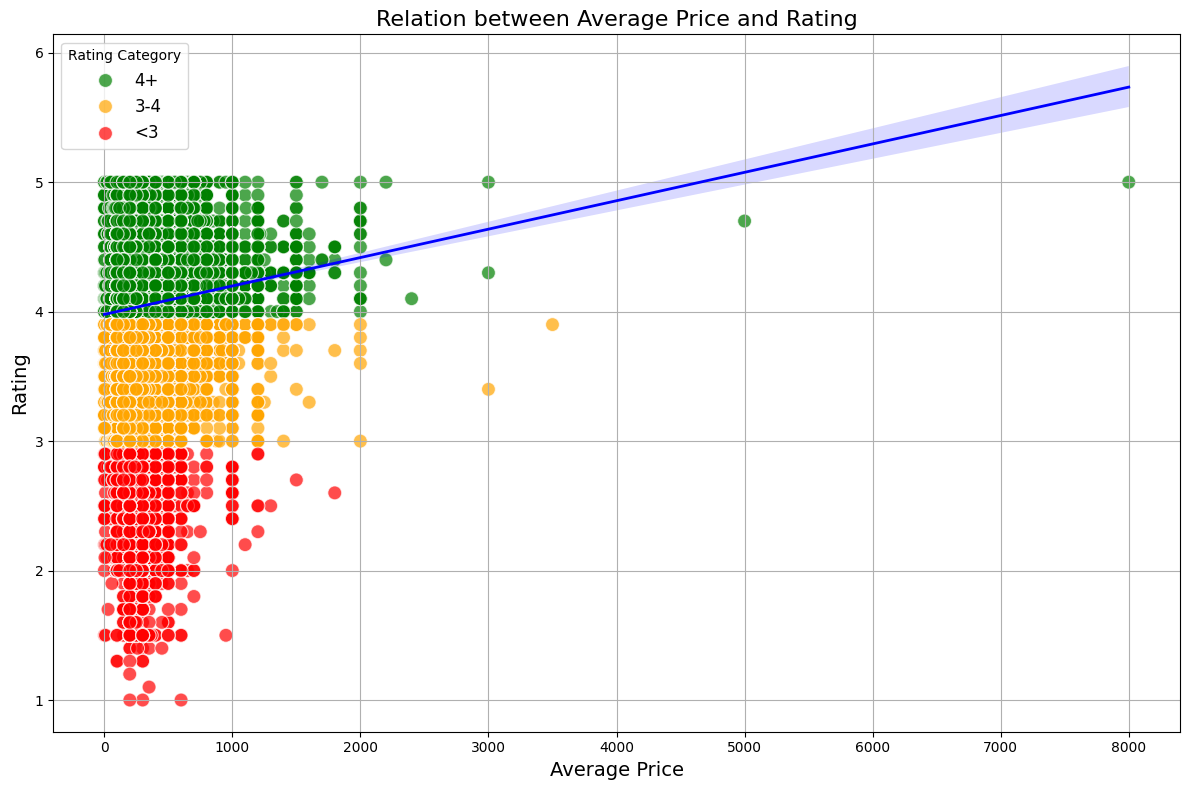

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract average price and rating data
average_price = df['Average Price']
rating = pd.to_numeric(df['Rating'], errors='coerce')

# Define rating categories
def categorize_rating(rating):
    if rating < 3:
        return '<3'
    elif 3 <= rating < 4:
        return '3-4'
    else:
        return '4+'

# Apply rating categorization
df['Rating Category'] = df['Rating'].apply(categorize_rating)

# Define a color palette for each category
palette = {'<3': 'red', '3-4': 'orange', '4+': 'green'}

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=average_price, y=rating, hue=df['Rating Category'], palette=palette, alpha=0.7, s=100)

# Add a trendline
sns.regplot(x=average_price, y=rating, scatter=False, color='blue', line_kws={'linewidth': 2})

plt.title('Relation between Average Price and Rating', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.legend(title='Rating Category', fontsize=12)
plt.grid(True)  # Add grid lines for better visualization
plt.tight_layout()
plt.show()
